In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#write down the interpretation of the info table
#
#
#

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#write down the interpretation of describe method of dataset
#
#
#
#

In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
def getgrade(mark):
    if(mark>=75):
        return "A"
    elif(mark>=60 and mark<75):
        return "B"
    elif(mark>=35 and mark<60):
        return "C"
    else:
        return "F"

In [9]:
df["Grade"] =df["Scores"].apply(getgrade)

In [10]:
df.head()

,Hours,Scores,Grade
0,2.5,21,F
1,5.1,47,C
2,3.2,27,F
3,8.5,75,A
4,3.5,30,F


In [11]:
df["Grade"].value_counts()

F    9
A    7
C    5
B    4
Name: Grade, dtype: int64

<AxesSubplot:>

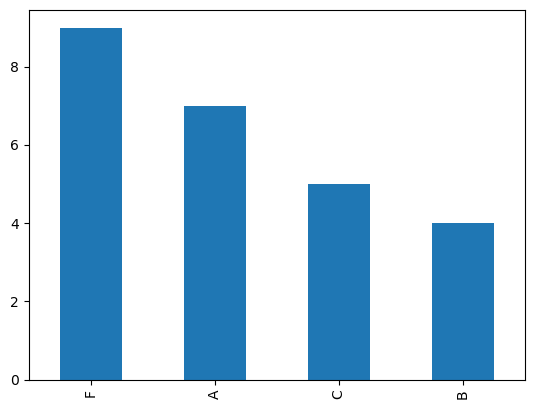

In [12]:
df["Grade"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Grade'>

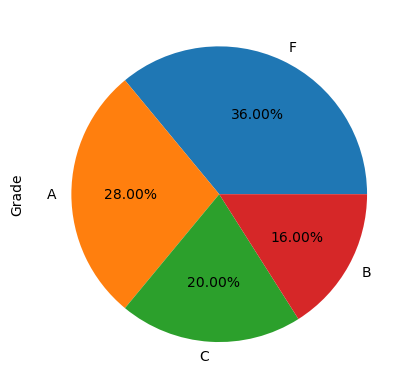

In [13]:
df["Grade"].value_counts().plot(kind="pie", autopct="%.2f%%")

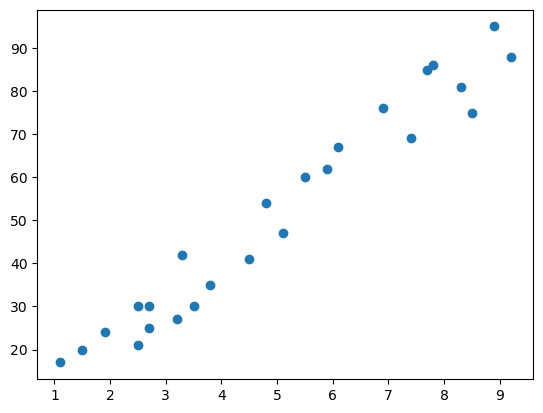

In [14]:
plt.scatter(df["Hours"], df["Scores"])

In [15]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [16]:
df.head()

,Hours,Scores,Grade
0,2.5,21,F
1,5.1,47,C
2,3.2,27,F
3,8.5,75,A
4,3.5,30,F


In [17]:
x = df.iloc[:, :-2] #2D
y = df.iloc[:, -2]  #1D

In [18]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [19]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [21]:
#step1 -: import the model
from sklearn.linear_model import LinearRegression

#step2 -: instialise the model
linreg = LinearRegression()

#step3 -: train the model -> m & c
linreg.fit(xtrain, ytrain)

#step4 -: make prediction
ypred = linreg.predict(xtest)

In [22]:
linreg.coef_

array([10.46110829])

In [23]:
linreg.intercept_

-1.5369573315500702

# Model Performance on Training Set

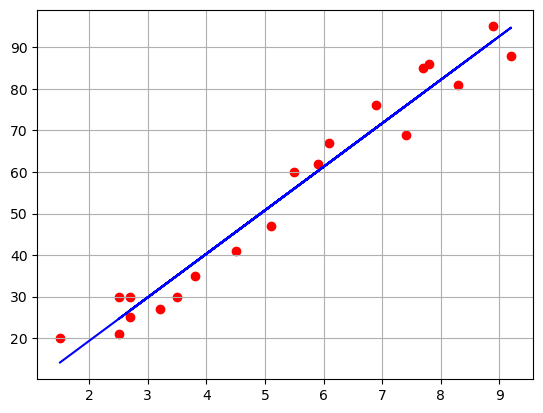

In [24]:
plt.scatter(xtrain, ytrain, color="red")
plt.plot(xtrain, linreg.predict(xtrain), color="blue")
# sns.lineplot(data=xtrain,x="Hours",y=linreg.predict(xtrain),color="blue")
plt.grid()
plt.show()

# Model Performance on Testing Set

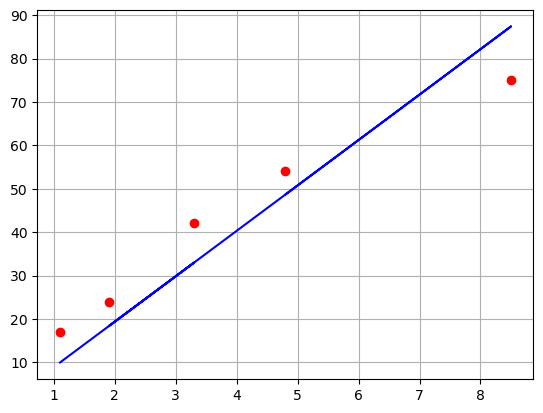

In [25]:
plt.scatter(xtest, ytest, color="red")
plt.plot(xtest, linreg.predict(xtest), color="blue")
#sns.lineplot(data=xtest,x="Hours",y="ypred")
plt.grid()
plt.show()

- y = x*m + c
- y = x(10) +(-1.5)

- if c=0, y= 10 * x

- if x =0, y = c

m tells the importance of the col. or how imp col is. Bigger m, more that col helps for interpretation.

# Model Evaluation

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)
print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 7.882398086270432
MSE : 68.88092074277635
RMSE : 8.299453038771674
Accuracy : 0.8421031525243527


# Model Testing on New Observation

In [27]:
def makeprediction():
    newob = float(input("Enter No of Hours you Study : "))
    yp = linreg.predict([[newob]])[0]
    print(f"If you study of {newob} hrs, you will score arround {yp:.2f} marks")
    return yp

In [28]:
makeprediction()

Enter No of Hours you Study : 5
If you study of 5.0 hrs, you will score arround 50.77 marks


50.768584136330794

In [29]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(linreg, pickle_out) 
pickle_out.close()
